# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount - This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings



In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.3.1
pandas version: 2.3.0
matplotlib version: 3.10.3
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet("../All_Data/2023-1.parquet")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Users/gouta/VSCprojects/Assignment1_NYC_Yellow_Taxi_Data/All_Data')

# Create a list of all the twelve files to read
file_list = sorted([f for f in os.listdir() 
                    if f.startswith('2023-') and f.endswith('.parquet')])

# initialise an empty dataframe
df = pd.DataFrame()                # final year-wide sample goes here
SAMPLE_FRAC   = 0.05               # 1 %
RANDOM_STATE  = 56


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Sampling {file_name:>12} … ", end='')

        # Reading the current file

        # read current month
        month_df = pd.read_parquet(file_path)

        # helper cols for date & hour (added in-place, so cheap)
        dt                = pd.to_datetime(month_df['tpep_pickup_datetime'])
        month_df['__date'] = dt.dt.date
        month_df['__hour'] = dt.dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for d in month_df['__date'].unique():
            day_slice = month_df[month_df['__date'] == d]

            # Iterate through each hour of the selected date
            for h in range(24):
                hour_slice = day_slice[day_slice['__hour'] == h]
                if hour_slice.empty:
                    continue      # no trips that hour → skip

                # Sample 1% of the hourly data randomly
                sample = hour_slice.sample(frac=SAMPLE_FRAC,
                                           random_state=RANDOM_STATE)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample],
                                         ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f"kept {len(sampled_data):,} rows")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Drop helper columns and show result
df = df.drop(columns=['__date', '__hour'])
print("\nDone! Final sampled DataFrame shape:", df.shape)

Sampling 2023-1.parquet … kept 152,087 rows
Sampling 2023-10.parquet … kept 174,255 rows
Sampling 2023-11.parquet … kept 165,133 rows
Sampling 2023-12.parquet … kept 166,709 rows
Sampling 2023-2.parquet … kept 168,696 rows
Sampling 2023-3.parquet … kept 163,786 rows
Sampling 2023-4.parquet … kept 139,641 rows
Sampling 2023-5.parquet … kept 144,458 rows
Sampling 2023-6.parquet … kept 162,910 rows
Sampling 2023-7.parquet … kept 174,068 rows
Sampling 2023-8.parquet … kept 143,782 rows
Sampling 2023-9.parquet … kept 140,875 rows

Done! Final sampled DataFrame shape: (1896400, 20)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_csv('nyc_taxi_2023_sample_379k.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [73]:
# Load the new data file
df = pd.read_csv(
        "nyc_taxi_2023_sample_379k.csv",
        parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"]
     )


In [74]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,0,2,2023-01-01 00:54:15,2023-01-01 00:57:54,1.0,0.81,1.0,N,107,170,...,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.0,NaN
1,1,2,2023-01-01 00:04:52,2023-01-01 00:18:02,1.0,3.38,1.0,N,142,75,...,16.3,1.0,0.5,6.39,0.0,1.0,27.69,2.5,0.0,NaN
2,2,2,2023-01-01 00:24:03,2023-01-01 01:09:13,6.0,6.21,1.0,N,90,24,...,44.3,1.0,0.5,4.93,0.0,1.0,54.23,2.5,0.0,NaN
3,3,2,2023-01-01 00:13:42,2023-01-01 00:27:15,2.0,1.62,1.0,N,158,114,...,13.5,1.0,0.5,3.00,0.0,1.0,21.50,2.5,0.0,NaN
4,4,2,2023-01-01 00:15:17,2023-01-01 00:23:04,2.0,1.23,1.0,N,211,79,...,9.3,1.0,0.5,3.58,0.0,1.0,17.88,2.5,0.0,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   VendorID               int64         
 2   tpep_pickup_datetime   datetime64[ns]
 3   tpep_dropoff_datetime  datetime64[ns]
 4   passenger_count        float64       
 5   trip_distance          float64       
 6   RatecodeID             float64       
 7   store_and_fwd_flag     object        
 8   PULocationID           int64         
 9   DOLocationID           int64         
 10  payment_type           int64         
 11  fare_amount            float64       
 12  extra                  float64       
 13  mta_tax                float64       
 14  tip_amount             float64       
 15  tolls_amount           float64       
 16  improvement_surcharge  float64       
 17  total_amount           float64       
 18  congestion_surcharge  

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [76]:
# Fix the index and drop any columns that are not needed

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')

df = df.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [77]:
# Combine the two airport fee columns

if 'Airport_fee' in df.columns:
    if 'airport_fee' in df.columns:
        # If both columns exist, fill the gaps in the lowercase one with the capitalised one.
        df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
    else:
        # If only the capitalised column exists, rename it to lowercase and drop the mixed-case one
        df = df.rename(columns={'Airport_fee': 'airport_fee'})

    # Drop the redundant mixed-case column (safe even if we just renamed)
    df = df.drop(columns='Airport_fee', errors='ignore')

    # all distinct values exactly as they appear in the column
uniq = df['airport_fee'].unique()
print(uniq)



[ 0.    1.25   nan -1.25  1.75 -1.75]


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [78]:
# check where values of fare amount are negative
df['airport_fee'] = df['airport_fee'].abs()

# all distinct values exactly as they appear in the column
uniq = df['airport_fee'].unique()
print(uniq)



[0.   1.25  nan 1.75]


Did you notice something different in the `RatecodeID` column for above records?

In [79]:
# Analyse RatecodeID for the negative fare amounts
uniq = df['RatecodeID'].unique()
print(uniq)



[ 1. nan  2.  4.  5.  3. 99.  6.]


In [80]:
# Find which columns have negative values

# Checks if columns are numeric
num_df = df.select_dtypes(include=[np.number])

# Checks if columns have ANY negatives
has_neg = (num_df < 0).any()

print("Columns containing at least one negative value:")
print(has_neg[has_neg].index.tolist())          # list of offending columns

# Exact count of negatives in each column 
neg_counts = (num_df < 0).sum()
neg_counts = neg_counts[neg_counts > 0]         # keep only columns with negatives

print("\nCount of negative values per column:")
print(neg_counts)


Columns containing at least one negative value:
['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

Count of negative values per column:
extra                     4
mta_tax                  82
improvement_surcharge    90
total_amount             90
congestion_surcharge     59
dtype: int64


In [81]:
# fix these negative values
# Get all numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Flip every negative value to positive
for col in num_cols:
    neg_mask = df[col] < 0          # True where the value is negative
    if neg_mask.any():              # skip columns that already have no negatives
        df.loc[neg_mask, col] = df.loc[neg_mask, col].abs()
        print(f"Fixed {neg_mask.sum():>6} negative values in '{col}'")

print("\nAll numeric columns are now non-negative.")


Fixed      4 negative values in 'extra'
Fixed     82 negative values in 'mta_tax'
Fixed     90 negative values in 'improvement_surcharge'
Fixed     90 negative values in 'total_amount'
Fixed     59 negative values in 'congestion_surcharge'

All numeric columns are now non-negative.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [82]:
# Find the proportion of missing values in each column
missing_share = df.isna().mean().sort_values(ascending=False)
print(missing_share.head())     # top columns with most missing data



store_and_fwd_flag      0.036269
RatecodeID              0.036269
passenger_count         0.036269
airport_fee             0.036269
congestion_surcharge    0.036269
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [83]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
missing_pc = df[df['passenger_count'].isna()]
print(f"Rows with NaN in passenger_count: {len(missing_pc)}")
display(missing_pc.head())

print("\nProportion missing:",
      df['passenger_count'].isna().mean())

mode_val = df['passenger_count'].mode()[0]   # usually 1

df['passenger_count'] = df['passenger_count'].fillna(mode_val)

assert df['passenger_count'].isna().sum() == 0
print("Passenger_count column has no missing values now.")

print("\nProportion missing:",
      df['passenger_count'].isna().mean())

Rows with NaN in passenger_count: 68781


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
17,2,2023-01-01 00:55:18,2023-01-01 01:16:11,NaN,4.77,NaN,NaN,145,48,0,28.25,0.0,0.5,3.22,0.0,1.0,35.47,NaN,NaN
37,2,2023-01-01 00:53:00,2023-01-01 01:10:00,NaN,4.94,NaN,NaN,116,141,0,24.46,0.0,0.5,7.12,0.0,1.0,35.58,NaN,NaN
48,2,2023-01-01 00:52:35,2023-01-01 01:08:29,NaN,0.91,NaN,NaN,50,48,0,13.16,0.0,0.5,0.00,0.0,1.0,17.16,NaN,NaN
64,2,2023-01-01 00:13:15,2023-01-01 00:18:32,NaN,1.13,NaN,NaN,211,90,0,12.80,0.0,0.5,3.36,0.0,1.0,20.16,NaN,NaN
70,2,2023-01-01 00:38:00,2023-01-01 00:45:00,NaN,2.49,NaN,NaN,141,74,0,15.03,0.0,0.5,3.43,0.0,1.0,22.46,NaN,NaN



Proportion missing: 0.036269246994305
Passenger_count column has no missing values now.

Proportion missing: 0.0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [84]:
# Fix missing values in 'RatecodeID'

# Felt like adding the airports since those would be easy
JFK_ZONES     = {132}        # “JFK Airport”
LGA_ZONES     = {138}        # “LaGuardia Airport”
EWR_ZONES     = {1}          # “Newark Airport” 

mask_na = df['RatecodeID'].isna()

# JFK or LGA -> 2   
mask_jfk = mask_na & (df['PULocationID'].isin(JFK_ZONES | LGA_ZONES) |
                      df['DOLocationID'].isin(JFK_ZONES | LGA_ZONES))
df.loc[mask_jfk, 'RatecodeID'] = 2

# Newark     -> 3
mask_ewr = mask_na & (df['PULocationID'].isin(EWR_ZONES) |
                      df['DOLocationID'].isin(EWR_ZONES))
df.loc[mask_ewr, 'RatecodeID'] = 3

# everything still NaN-> default to the 1
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

print("Remaining NaNs:", df['RatecodeID'].isna().sum())   




Remaining NaNs: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [85]:
# handle null values in congestion_surcharge

# check how many values are missing
print("NaNs in congestion_surcharge:", df['congestion_surcharge'].isna().sum())

# fill with most frequent value
mode_val = df['congestion_surcharge'].mode()[0]    # returns 0 or 2.5
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_val)

# verify
assert df['congestion_surcharge'].isna().sum() == 0
print(f"Missing values imputed with {mode_val}.")



NaNs in congestion_surcharge: 68781
Missing values imputed with 2.5.


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [86]:
# Handle any remaining missing values

#checking what other nulls are left
null_counts = df.isna().sum()      # or df.isnull().sum()
print(null_counts)

# For 'store_and_fwd_flag'
# Filling the store_and_fwd_flag column with N in place of Null
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

# For 'airport_fee'
# Finding airport_fee based on RatecodeID
rate_to_fee = {
    2: 1.25,   # JFK
    3: 1.25,   # Newark
}

mask_fix = (
    df['airport_fee'].isna() &
    df['RatecodeID'].isin(rate_to_fee.keys())
)

# Imputing the correct fee
df.loc[mask_fix, 'airport_fee'] = (
    df.loc[mask_fix, 'RatecodeID'].map(rate_to_fee)
)

# Setting remaining NaNs (trips with no surcharge) to 0
df['airport_fee'] = df['airport_fee'].fillna(0)

null_counts = df.isna().sum()      # or df.isnull().sum()
print(null_counts)



VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       68781
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              68781
dtype: int64
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount        

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [87]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()




,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.737071e+00,2023-07-02 19:59:53.521346816,2023-07-02 20:17:23.155939584,1.357809e+00,4.324947e+00,1.632474e+00,1.653140e+02,1.640059e+02,1.160726e+00,1.990978e+01,1.577755e+00,4.953869e-01,3.553988e+00,6.020197e-01,9.990119e-01,2.898812e+01,2.315778e+00,1.423912e-01
min,1.000000e+00,2022-12-31 23:58:08,2023-01-01 00:04:32,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:12:05.500000,2023-04-02 16:33:57.249999872,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:45:09.500000,2023-06-27 16:06:34.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:40:02.500000,2023-10-06 19:56:49,1.000000e+00,3.410000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.250000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:59:57,2024-01-01 23:02:22,9.000000e+00,1.919450e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.726600e+03,1.921000e+01,5.316000e+01,4.829000e+02,1.110000e+02,1.000000e+00,1.736290e+03,2.500000e+00,1.750000e+00
std,4.461379e-01,NaN,NaN,8.798342e-01,2.769217e+02,7.373799e+00,6.402723e+01,6.985274e+01,5.103294e-01,1.840453e+01,1.827216e+00,7.217377e-02,4.066428e+00,2.189673e+00,2.883805e-02,2.295449e+01,6.531594e-01,4.625337e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [88]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6].reset_index(drop=True)


In [89]:
# Continue with outlier handling

# where 'fare_amount is more than 1000
df = df[df['fare_amount'] <= 1000].reset_index(drop=True) 

# where `trip_distance` is nearly 0
df = df[~((df['trip_distance'] <= 0.1))].reset_index(drop=True)

# where 'fare_amount' is nearly 0
df = df[~((df['fare_amount'] <= 0.1))].reset_index(drop=True)

# where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df['trip_distance'] == 0) &
          (df['fare_amount']   == 0) &
          (df['PULocationID'] != df['DOLocationID']))
       ].reset_index(drop=True)

# where `trip_distance` is more than 250  miles.
df = df[df['trip_distance'] <= 250].reset_index(drop=True)

# where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[df['payment_type'] != 0].reset_index(drop=True)

df.describe()

df.to_csv('temp.csv', index=False)

In [90]:
# Do any columns need standardising?

num_cols_to_scale = [
    'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount',
    'total_amount', 'extra', 'mta_tax', 'improvement_surcharge',
    'congestion_surcharge', 'airport_fee'
]

for col in num_cols_to_scale:
    mu  = df[col].mean()
    std = df[col].std()
    df[col + '_z'] = (df[col] - mu) / std        # keep a new “_z” column

df.describe()
#df.to_csv('temp.csv', index=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,trip_distance_z,fare_amount_z,tip_amount_z,tolls_amount_z,total_amount_z,extra_z,mta_tax_z,improvement_surcharge_z,congestion_surcharge_z,airport_fee_z
count,1.799889e+06,1799889,1799889,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,...,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06,1.799889e+06
mean,1.741746e+00,2023-07-01 19:42:20.760110080,2023-07-01 19:59:53.932388352,1.371931e+00,3.514069e+00,1.580275e+00,1.655224e+02,1.642742e+02,1.196174e+00,1.968261e+01,...,7.074284e-17,1.238000e-16,-4.295101e-17,1.414857e-17,1.743306e-16,3.688734e-17,-3.938860e-16,-4.417764e-15,2.526530e-16,1.920163e-17
min,1.000000e+00,2022-12-31 23:58:08,2023-01-01 00:04:32,0.000000e+00,1.100000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e-01,...,-7.436319e-01,-1.090869e+00,-8.964887e-01,-2.761540e-01,-1.224326e+00,-8.934960e-01,-7.409187e+00,-6.282839e+01,-3.642080e+00,-3.084942e-01
25%,1.000000e+00,2023-04-01 19:04:16,2023-04-01 19:20:10,1.000000e+00,1.090000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,...,-5.295472e-01,-5.786693e-01,-6.470137e-01,-2.761540e-01,-5.697475e-01,-8.934960e-01,4.262584e-02,2.224701e-02,2.745688e-01,-3.084942e-01
50%,2.000000e+00,2023-06-25 23:20:01,2023-06-25 23:39:37,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,...,-3.744450e-01,-3.445845e-01,-1.780007e-01,-2.761540e-01,-3.471377e-01,-3.489507e-01,4.262584e-02,2.224701e-02,2.745688e-01,-3.084942e-01
75%,2.000000e+00,2023-10-05 19:11:51,2023-10-05 19:28:55,1.000000e+00,3.420000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,...,-2.054973e-02,1.235849e-01,2.211594e-01,-2.761540e-01,8.129789e-02,4.678673e-01,4.262584e-02,2.224701e-02,2.745688e-01,-3.084942e-01
max,2.000000e+00,2023-12-31 23:59:57,2024-01-01 23:02:22,6.000000e+00,2.026000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,7.863000e+02,...,4.349109e+01,4.272700e+01,1.195750e+02,5.072116e+01,3.364282e+01,8.499911e+00,7.848676e+02,2.224701e-02,2.745688e-01,3.446254e+00
std,4.376747e-01,NaN,NaN,8.938875e-01,4.577626e+00,7.123017e+00,6.357595e+01,6.974599e+01,4.503598e-01,1.794222e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [91]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'trip_distance_z',
 'fare_amount_z',
 'tip_amount_z',
 'tolls_amount_z',
 'total_amount_z',
 'extra_z',
 'mta_tax_z',
 'improvement_surcharge_z',
 'congestion_surcharge_z',
 'airport_fee_z']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

Ans. These are **Numerical Parameters**

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

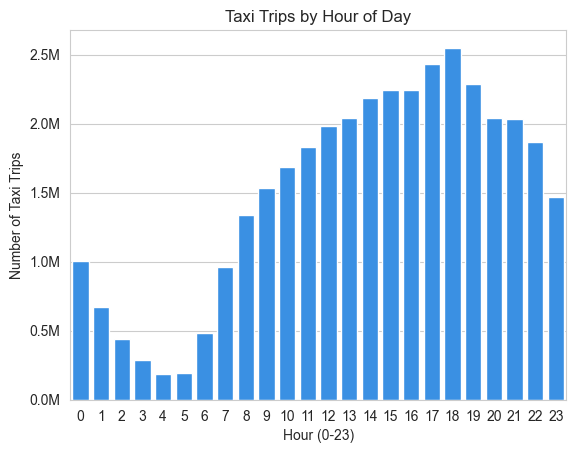

pickup_hour
0     1002460.0
1      669980.0
2      438780.0
3      285640.0
4      183000.0
5      193340.0
6      482240.0
7      959040.0
8     1341840.0
9     1537140.0
10    1683900.0
11    1828620.0
12    1984380.0
13    2043760.0
14    2189120.0
15    2244360.0
16    2243020.0
17    2434220.0
18    2551000.0
19    2285360.0
20    2041360.0
21    2034520.0
22    1870540.0
23    1470160.0
Name: weight, dtype: float64


In [92]:
# Making sure the datetime columns are in the correct format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

df["weight"] = 1 / SAMPLE_FRAC                      # Weighting the counts by the sampling fraction

# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour      # Separating the hour from the pickup datetime

hour_totals   = df.groupby("pickup_hour")["weight"].sum() 

sns.barplot(x=hour_totals.index, y=hour_totals.values, color="dodgerblue")  # Plotting pickup counts per hour
plt.title("Taxi Trips by Hour of Day")
plt.xlabel('Hour (0-23)')
plt.ylabel("Number of Taxi Trips")
plt.gcf().axes[0].yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _ : f"{x/1e6:.1f}M"))
plt.show()

print(hour_totals)                  # Pickup counts per hour as a table

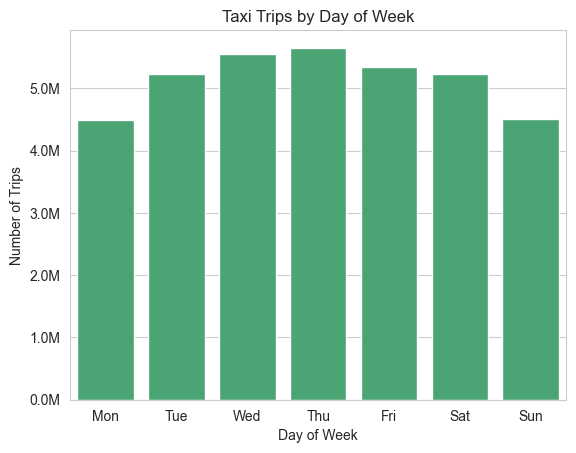

pickup_dayofweek
Mon    4495520.0
Tue    5230900.0
Wed    5545300.0
Thu    5650640.0
Fri    5341120.0
Sat    5223440.0
Sun    4510860.0
Name: weight, dtype: float64


In [93]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek    # Separating the days of the week from the pickup datetime

pop_counts = (
    df.groupby("pickup_dayofweek")["weight"]
      .sum()                          # sum weights gives estimated trip total
      .reindex(range(7), fill_value=0)  # keep all days, ensure correct order
)

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(x=pop_counts.index,                 # Plotting pickup counts per day of the week
            y=pop_counts.values,
            color="MediumSeaGreen")    
plt.title('Taxi Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(range(7), days)
plt.gcf().axes[0].yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _ : f"{x/1e6:.1f}M"))
plt.show()

print(pop_counts.rename(index=dict(enumerate(days))))           # Pickup counts per day of the week as a table



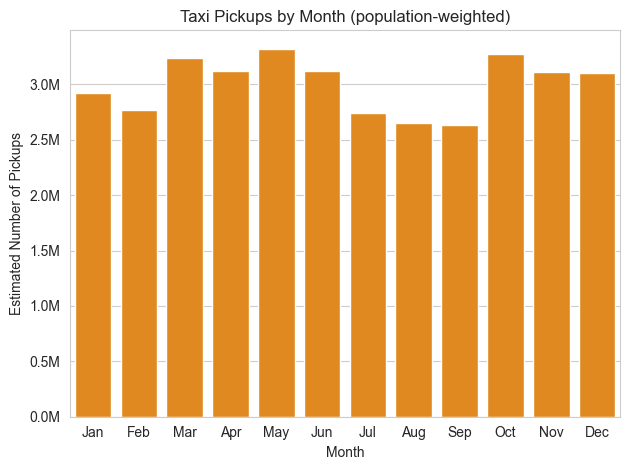

pickup_month
Jan    2921680.0
Feb    2767020.0
Mar    3233340.0
Apr    3119920.0
May    3320660.0
Jun    3123640.0
Jul    2742300.0
Aug    2653200.0
Sep    2629980.0
Oct    3269820.0
Nov    3113400.0
Dec    3102820.0
Name: weight, dtype: float64


In [94]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month        # Separating the months from the pickup datetime

month_totals = (
    df.groupby("pickup_month")["weight"]
      .sum()                         # sum weights gives estimated trip count
      .reindex(range(1, 13), fill_value=0)   # keep Jan-Dec order
)

sns.barplot(x=month_totals.index,
            y=month_totals.values,
            color="darkorange")
plt.title("Taxi Pickups by Month (population-weighted)")
plt.xlabel("Month")
plt.ylabel("Estimated Number of Pickups")
plt.xticks(range(0, 12),             # positions 0-11
           ["Jan","Feb","Mar","Apr","May","Jun",
            "Jul","Aug","Sep","Oct","Nov","Dec"])
plt.gcf().axes[0].yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _ : f"{x/1e6:.1f}M"))
plt.tight_layout()
plt.show()

print(month_totals.rename(index=dict(zip(range(1,13),
       ["Jan","Feb","Mar","Apr","May","Jun",
        "Jul","Aug","Sep","Oct","Nov","Dec"]))))       # Pickup counts per month as a table

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [95]:
# Analyse the above parameters
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

check = pd.DataFrame({
    'negatives' : (df[cols] < 0).sum(),
    'zeros'     : (df[cols] == 0).sum()
})

print(check)


               negatives   zeros
fare_amount            0       0
tip_amount             0  389435
total_amount           0       0
trip_distance          0       0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [96]:
# Create a df with non zero entries for the selected parameters.
df = df[
        ~( (df['fare_amount']   == 0) |
           (df['total_amount']  == 0) |
           ((df['trip_distance'] == 0) &
            (df['PULocationID']  != df['DOLocationID']))
         )
     ].reset_index(drop=True)

cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

check = pd.DataFrame({
    'negatives' : (df[cols] < 0).sum(),
    'zeros'     : (df[cols] == 0).sum()
})

print(check)


               negatives   zeros
fare_amount            0       0
tip_amount             0  389435
total_amount           0       0
trip_distance          0       0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
2022-12         422.4
2023-01    79764154.2
2023-02    75358588.6
2023-03    91265287.2
2023-04    89603297.2
2023-05    97153432.0
2023-06    91507072.6
2023-07    79426610.6
2023-08    77365978.8
2023-09    79339541.4
2023-10    96871269.6
2023-11    90900388.0
2023-12    90317362.2
Freq: M, Name: weighted_revenue, dtype: float64


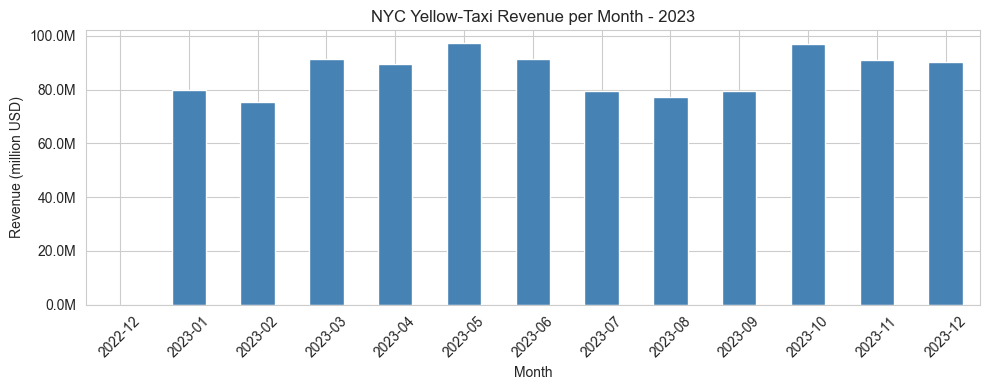

In [97]:
# Group data by month and analyse monthly revenue

df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Aggregate revenue by month  
rev_by_month = (
    df.assign(weighted_revenue = df["total_amount"] * df["weight"])
      .groupby("pickup_month")["weighted_revenue"]
      .sum()
      .sort_index()
)

print(rev_by_month)

# Plotting monthly revenue
fig, ax = plt.subplots(figsize=(10,4))

(rev_by_month / 1e6).plot(
    kind="bar",
    color="steelblue",
    ax=ax
)

ax.set_title("NYC Yellow-Taxi Revenue per Month - 2023")
ax.set_ylabel("Revenue (million USD)")
ax.set_xlabel("Month")
ax.set_xticklabels(rev_by_month.index.astype(str), rotation=45)
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"{x:,.1f}M")
)                   # 1.5 → “1.5 M”
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

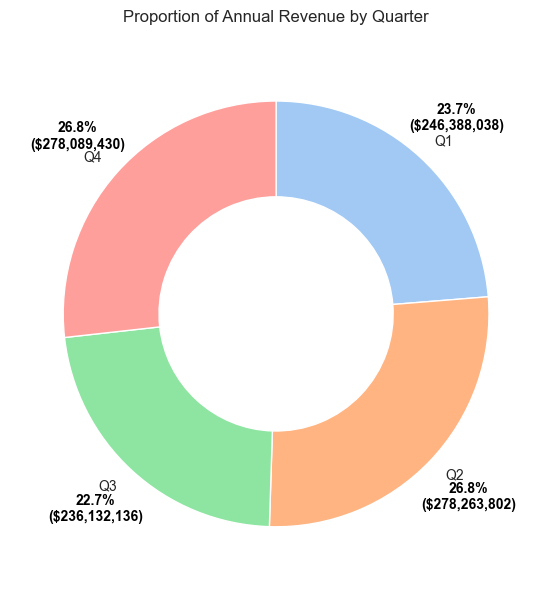

In [98]:
# Calculate proportion of each quarter

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter
df['weighted_revenue'] = df['total_amount'] * df['weight']

rev_by_qtr = (df.groupby('pickup_quarter')['weighted_revenue']
                .sum()
                .reindex([1,2,3,4], fill_value=0))              # Q1-Q4 order

proportions = rev_by_qtr / rev_by_qtr.sum()

def pct_and_value(pct, allvals):
    absolute = pct/100 * allvals.sum()
    return f"{pct:.1f}%\n(${absolute:,.0f})"

# Plotting the quarterly revenue proportions as a donut chart

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
        proportions,
        labels=["Q1","Q2","Q3","Q4"],
        autopct=lambda pct: pct_and_value(pct, rev_by_qtr),   
        pctdistance=1.25,
        startangle=90,
        counterclock=False,
        colors=sns.color_palette("pastel"),
        wedgeprops=dict(width=0.45)
)

plt.setp(autotexts, size=10, weight="bold", color="black")   
plt.title("Proportion of Annual Revenue by Quarter\n")
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

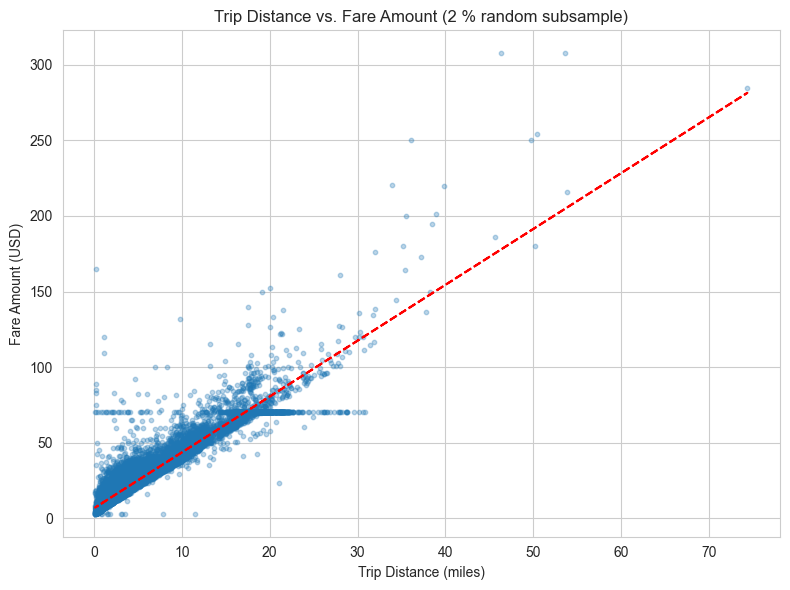

Pearson correlation: 0.951


In [99]:
# Keep only trips with a positive distance
df = df[df["trip_distance"] > 0]

# Show how trip fare is affected by distance
sample = df.sample(frac=0.02, random_state=42)   # 2 % subsample

z = np.polyfit(sample["trip_distance"], sample["fare_amount"], 1)   # For trend line
p = np.poly1d(z)

# Scatter plot of trip distance vs. fare amount
plt.figure(figsize=(8,6))
plt.scatter(sample["trip_distance"],
            sample["fare_amount"],
            alpha=0.3, s=10)
plt.plot(sample["trip_distance"], p(sample["trip_distance"]), "r--")
plt.title("Trip Distance vs. Fare Amount (2 % random subsample)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount (USD)")
plt.tight_layout()
plt.show()


# Calculate the Pearson correlation coefficient between trip distance and fare amount
corr = np.corrcoef(df["trip_distance"], df["fare_amount"])[0,1]
print(f"Pearson correlation: {corr:.3f}")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

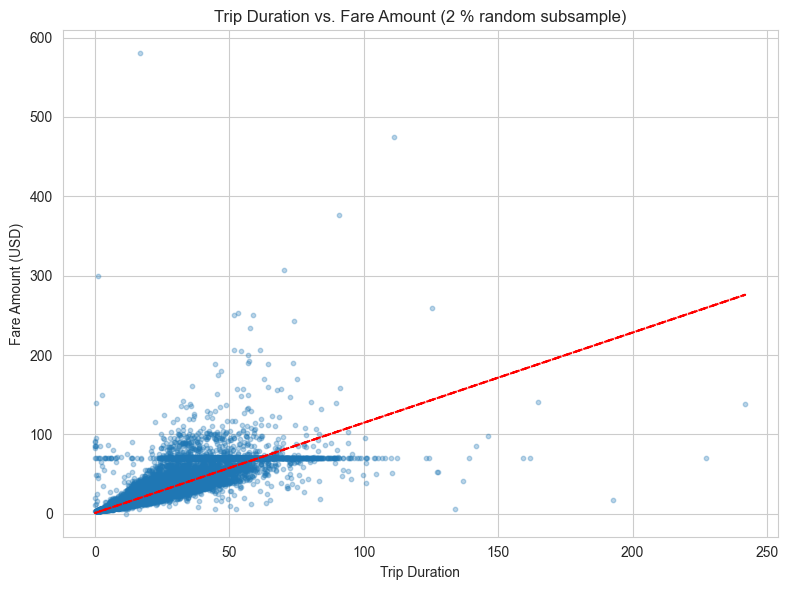

Pearson correlation: 0.847


In [100]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Filter out trips with non-positive or excessively long durations
df = df[(df["trip_duration"] > 0) & (df["trip_duration"] <= 300)] 

# Sample the data
sample = df.sample(frac=0.02, random_state=42)

z = np.polyfit(sample["trip_duration"], sample["fare_amount"], 1)   # For trend line
p = np.poly1d(z)

# Scatter plot of trip duration vs. fare amount
plt.figure(figsize=(8,6))
plt.scatter(sample["trip_duration"],
            sample["fare_amount"],
            alpha=0.3, s=10)
plt.plot(sample["trip_duration"], p(sample["trip_duration"]), "r--")
plt.title("Trip Duration vs. Fare Amount (2 % random subsample)")
plt.xlabel("Trip Duration")
plt.ylabel("Fare Amount (USD)")
plt.tight_layout()
plt.show()

# Calculate the Pearson correlation coefficient between trip duration and fare amount
corr = np.corrcoef(df["trip_duration"], df["fare_amount"])[0,1]
print(f"Pearson correlation: {corr:.3f}")



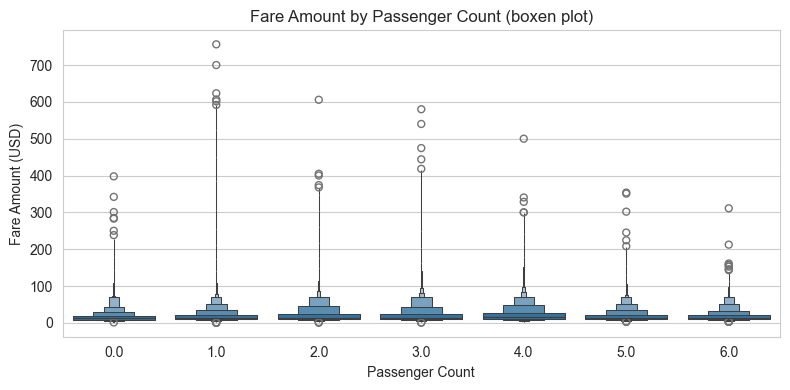

Pearson correlation: 0.044


In [101]:
# Show relationship between fare and number of passengers

# Boxen plot to show fare amount by passenger count
plt.figure(figsize=(8,4))
sns.boxenplot(x="passenger_count",
              y="fare_amount",
              data=df)
plt.title("Fare Amount by Passenger Count (boxen plot)")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount (USD)")
plt.tight_layout()
plt.show()



# Calculate the Pearson correlation coefficient between passenger count and fare amount
corr = np.corrcoef(df["passenger_count"], df["fare_amount"])[0,1]
print(f"Pearson correlation: {corr:.3f}")



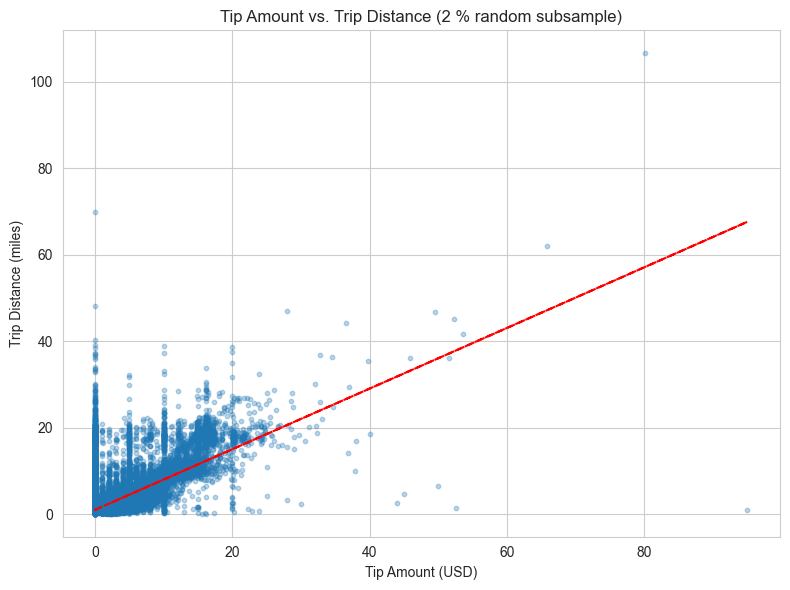

Pearson correlation: 0.590


In [102]:
# Show relationship between tip and trip distance

z = np.polyfit(sample["tip_amount"], sample["trip_distance"], 1)   # For trend line
p = np.poly1d(z)

# Scatter plot of tip amount vs. trip distance
plt.figure(figsize=(8,6))
plt.scatter(sample["tip_amount"],
            sample["trip_distance"],
            alpha=0.3, s=10)
plt.plot(sample["tip_amount"], p(sample["tip_amount"]), "r--")
plt.title("Tip Amount vs. Trip Distance (2 % random subsample)")
plt.xlabel("Tip Amount (USD)")
plt.ylabel("Trip Distance (miles)")
plt.tight_layout()
plt.show()


# Calculate the Pearson correlation coefficient between tip amount and trip_distance
corr = np.corrcoef(df["tip_amount"], df["trip_distance"])[0,1]
print(f"Pearson correlation: {corr:.3f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type_named
Credit card    29494200.0
Cash            6117340.0
Dispute          229440.0
No charge        123780.0
Name: weight, dtype: float64


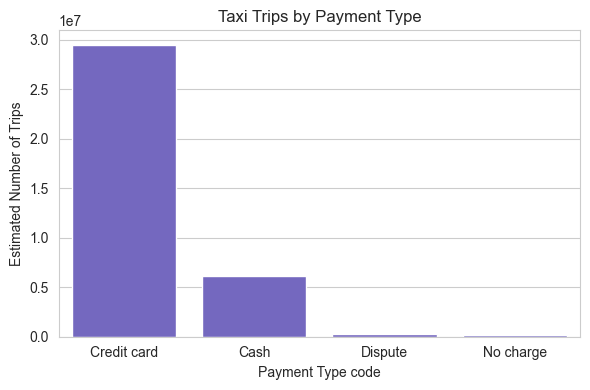

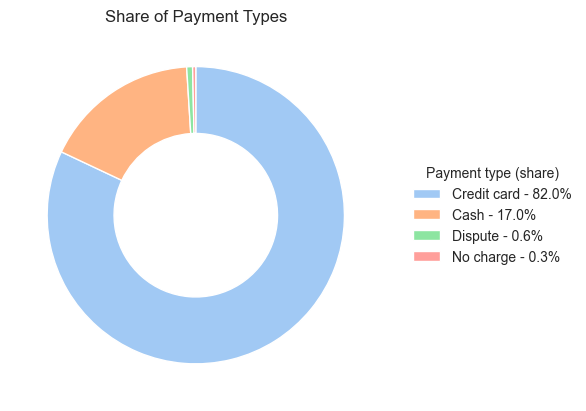

In [103]:
# Analyse the distribution of different payment types (payment_type).

#adding labels for payment types
pay_labels = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute"
}

# Map the payment_type to the labels
df["payment_type_named"] = df["payment_type"].map(pay_labels)

# Group by payment type and calculate total weight (number of trips)
pay_totals = (df
              .groupby("payment_type_named")["weight"]
              .sum()
              .sort_values(ascending=False))
print(pay_totals)

# Plot the payment type totals as a bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=pay_totals.index,
            y=pay_totals.values,
            color="slateblue")

plt.title("Taxi Trips by Payment Type")
plt.xlabel("Payment Type code")
plt.ylabel("Estimated Number of Trips")
plt.tight_layout()
plt.show()

# Calculate the proportions of each payment type
proportions = pay_totals / pay_totals.sum()

# Donut chart to show the share of payment types
fig, ax = plt.subplots(figsize=(6,6))

wedges, _ = ax.pie(
    proportions,
    startangle=90,
    counterclock=False,
    colors=sns.color_palette("pastel"),
    wedgeprops=dict(width=0.45)       # hollow centre
)

# legend for donut chart
legend_labels = [
    f"{name} - {pct*100:.1f}%"
    for name, pct in zip(pay_totals.index, proportions)
]

ax.legend(
    wedges, legend_labels,
    title="Payment type (share)",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    frameon=False
)

ax.set(
    aspect="equal",
    title="Share of Payment Types"
)
plt.tight_layout()
plt.show()





- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [104]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [105]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("C:/Users/gouta/VSCprojects/Assignment1_NYC_Yellow_Taxi_Data/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

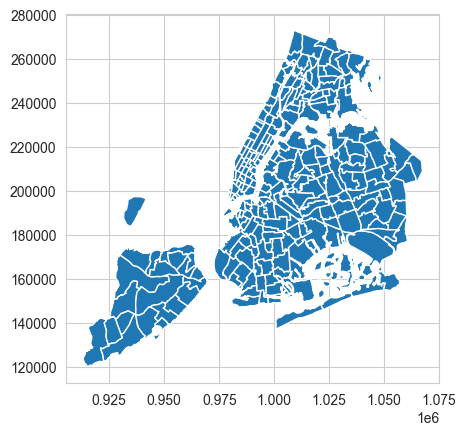

In [106]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [107]:
# Merge zones and trip records using locationID and PULocationID

df = df.merge(
        zones[["LocationID", "zone", "borough"]],   # keep only useful cols
        how="left",
        left_on="PULocationID",
        right_on="LocationID"
     )

print(df[["PULocationID", "zone", "borough"]].head())

   PULocationID                           zone    borough
0           107                       Gramercy  Manhattan
1           142            Lincoln Square East  Manhattan
2            90                       Flatiron  Manhattan
3           158  Meatpacking/West Village West  Manhattan
4           211                           SoHo  Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [108]:
# Group data by location and calculate the number of trips

# Population-weighted trip count per pickup LocationID
pu_counts = (df.groupby("PULocationID")["weight"]
               .sum()                       # sum weights ⇒ estimated # trips
               .astype(int)                 # nicer display
               .rename("trips")             # column name
               .reset_index())

# Add zone + borough names for readability
pu_counts = (pu_counts
             .merge(zones[["LocationID", "zone", "borough"]],
                    left_on="PULocationID", right_on="LocationID",
                    how="left")
             .drop(columns="LocationID")        # avoid duplicate
             .sort_values("trips", ascending=False))

# Top 10 pickup locations by trip count
print(pu_counts.head(10))


     PULocationID    trips                          zone    borough
125           132  1892200                   JFK Airport     Queens
225           237  1719700         Upper East Side South  Manhattan
153           161  1693780                Midtown Center  Manhattan
224           236  1530100         Upper East Side North  Manhattan
154           162  1301800                  Midtown East  Manhattan
131           138  1273000             LaGuardia Airport     Queens
177           186  1256720  Penn Station/Madison Sq West  Manhattan
218           230  1210120     Times Sq/Theatre District  Manhattan
135           142  1190800           Lincoln Square East  Manhattan
162           170  1077140                   Murray Hill  Manhattan


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [109]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(
            pu_counts[["PULocationID", "trips"]],   # only need the tally
            how="left",
            left_on="LocationID",
            right_on="PULocationID"
        )

# Any zone that had zero sampled trips will have NaN; replace with 0
zones["trips"] = zones["trips"].fillna(0).astype(int)

# Checking if it worked 
print(zones[["LocationID", "zone", "borough", "trips"]].head())



   LocationID                     zone        borough  trips
0           1           Newark Airport            EWR    580
1           2              Jamaica Bay         Queens      0
2           3  Allerton/Pelham Gardens          Bronx    780
3           4            Alphabet City      Manhattan  35300
4           5            Arden Heights  Staten Island    400


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

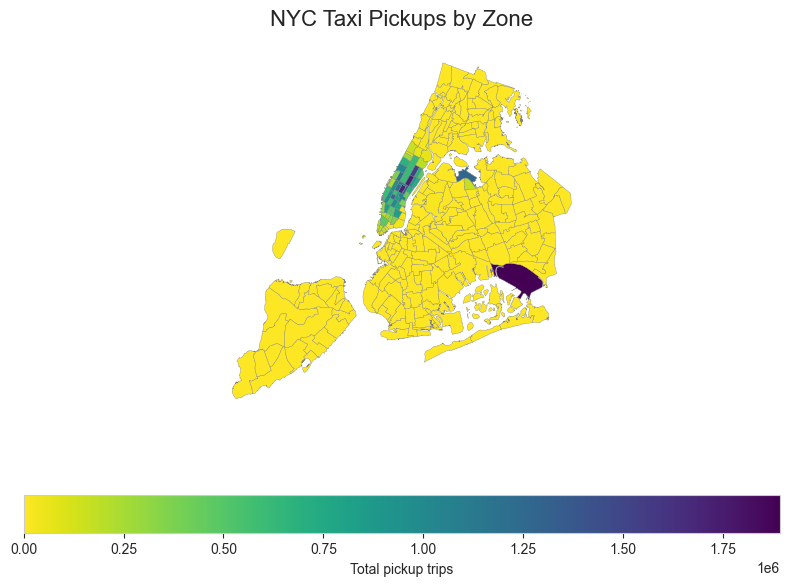

In [110]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the map and display it

zones.plot(
    column="trips",
    cmap="viridis_r",
    linewidth=0.25,
    edgecolor="grey",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Total pickup trips", "orientation": "horizontal"}
)


ax.set_title("NYC Taxi Pickups by Zone", fontsize=16, pad=15)
ax.axis("off")                          # hide x-/y-axes
plt.tight_layout()
plt.show()


In [111]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the GeoDataFrame so the busiest zones appear first
zones_sorted = zones.sort_values("trips", ascending=False)

# Display the top 10 rows (remove .head(10) to show the full table)
zones_sorted



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trips
133,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,1892200
238,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,1719700
162,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,1693780
237,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,1530100
163,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,1301800
...,...,...,...,...,...,...,...,...,...
173,172,0.118476,0.000658,New Dorp/Midland Beach,172,Staten Island,"POLYGON ((960204.812 146820.751, 960103.437 14...",NaN,0
207,206,0.212757,0.000944,Saint George/New Brighton,206,Staten Island,"POLYGON ((961436.305 175473.03, 961460.942 175...",NaN,0
205,204,0.101912,0.000641,Rossville/Woodrow,204,Staten Island,"POLYGON ((927766.539 141772.465, 927864.475 14...",NaN,0
188,187,0.126868,0.000421,Port Richmond,187,Staten Island,"MULTIPOLYGON (((946964.115 173161.64, 946977.8...",NaN,0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* **Busiest hours, days and months:-**  Hour:- 6pm, 
                                        Day of the Week:- Thursday,
                                        Month:- May,

* **Trends in revenue collected:-** The months of October and May have the highest revenue

* **Trends in quarterly revenue:-** Q2 and Q4 get the highest revenue at about 26.8%

* **How fare depends on trip distance, trip duration and passenger counts:-** trip distance and trip duration have a linear relationship with fare while passenger counts do not affect fares at all.

* **How tip amount depends on trip distance:-** Tip amount certainly increases based on trip distance but correlation isn't high.

* **Busiest zones:-** The 5 busiest zones (in order) are:- JFK Airport, Upper East Side South, Midtown Center, Upper East Side North, and Midtown east.


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [112]:
# Find routes which have the slowest speeds at different times of the day

# Find the average trip duration and distance for each pickup and dropoff location pair, grouped by hour of the day
avg_duration = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_duration'].mean().reset_index()
avg_distance = df.groupby(['PULocationID', 'DOLocationID'])['trip_distance'].mean().reset_index()

# Find slowest speed routes by calculating average speed (in mph) for each route
route_speed = pd.merge(avg_duration, avg_distance, on=['PULocationID', 'DOLocationID'])
route_speed['avg_speed'] = route_speed['trip_distance'] / (route_speed['trip_duration'] / 60)
slowest_routes = route_speed.sort_values(by='avg_speed').head(10)

# Adding names of pickup and drop-off zones to the slowest routes
lookup = zones[["LocationID", "zone"]].rename(columns={"zone": "PU_zone"})

# add pickup-zone name
slowest_named = (
    slowest_routes
      .merge(lookup, left_on="PULocationID", right_on="LocationID", how="left")
      .drop(columns="LocationID")
)

# Add drop-off zone name
lookup = lookup.rename(columns={"PU_zone": "DO_zone"})  # reuse same DF
slowest_named = (
    slowest_named
      .merge(lookup, left_on="DOLocationID", right_on="LocationID", how="left")
      .drop(columns="LocationID")
)

# Reordering columns
cols = ["PU_zone", "DO_zone", "pickup_hour",
        "trip_duration", "trip_distance", "avg_speed",
        "PULocationID", "DOLocationID"]
slowest_named = slowest_named[cols]

slowest_named.head(10)


,PU_zone,DO_zone,pickup_hour,trip_duration,trip_distance,avg_speed,PULocationID,DOLocationID
0,Chinatown,Pelham Bay Park,15,73.766667,0.20,0.162675,45,184
1,Bushwick South,NaN,20,84.016667,0.27,0.192819,37,264
2,Van Nest/Morris Park,Yorkville West,10,56.683333,0.20,0.211702,242,263
3,Morningside Heights,Queensbridge/Ravenswood,8,81.283333,0.29,0.214066,166,193
4,Two Bridges/Seward Park,Bellerose,10,41.433333,0.20,0.289622,232,19
5,Brownsville,Seaport,12,75.866667,0.40,0.316344,35,209
6,Co-Op City,Prospect Heights,6,55.466667,0.30,0.324519,51,189
7,Boerum Hill,East New York/Pennsylvania Avenue,19,68.366667,0.40,0.351048,25,77
8,Upper East Side North,Sheepshead Bay,11,58.900000,0.40,0.407470,236,210
9,Flushing,Sheepshead Bay,12,42.700000,0.30,0.421546,92,210


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

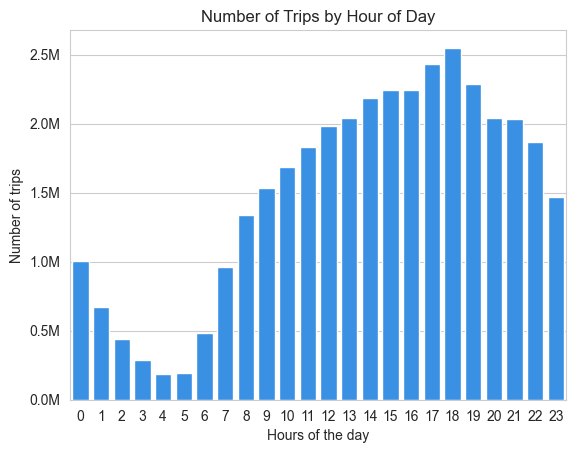

Busiest hour: 18:00  -  2,551,000 trips


In [113]:
# Visualise the number of trips per hour and find the busiest hour

# Already did this earlier at 3.1.2. Using values obtained from there.
sns.barplot(x=hour_totals.index, y=hour_totals.values, color="dodgerblue")  # Plotting pickup counts per hour
plt.title("Number of Trips by Hour of Day")
plt.xlabel('Hours of the day')
plt.ylabel("Number of trips")
plt.gcf().axes[0].yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _ : f"{x/1e6:.1f}M"))
plt.show()

busiest_hour  = hour_totals.idxmax()   # Gives the hour (0-23) with the largest value
busiest_trips = hour_totals.max()      # The estimated number of trips in that hour

print(f"Busiest hour: {busiest_hour}:00  -  {busiest_trips:,.0f} trips")




Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Five busiest hours and their estimated trip counts:
pickup_hour
18    2551000.0
17    2434220.0
19    2285360.0
15    2244360.0
16    2243020.0


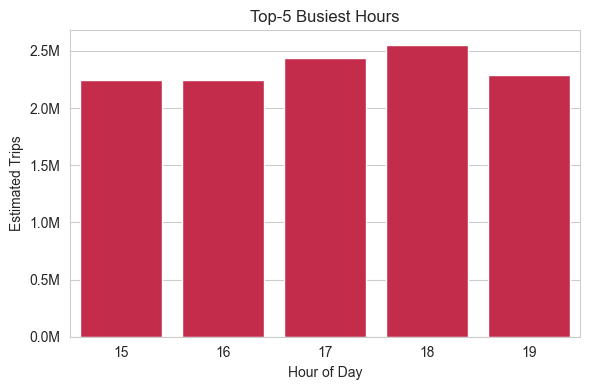

In [114]:
# Scale up the number of trips
# I have already been scaling up the number of trips by using the SAMPLE_FRAC variable.

top5 = hour_totals.nlargest(5)          # returns a Series sorted by value

# Display the result
print("Five busiest hours and their estimated trip counts:")
print(top5.to_string().replace(":", ":00  →  "))

# Quick bar chart of just those hours

plt.figure(figsize=(6,4))
sns.barplot(x=top5.index, y=top5.values, color="crimson")
plt.title("Top-5 Busiest Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Estimated Trips")
plt.gcf().axes[0].yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _ : f"{x/1e6:.1f}M"))
plt.tight_layout()
plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

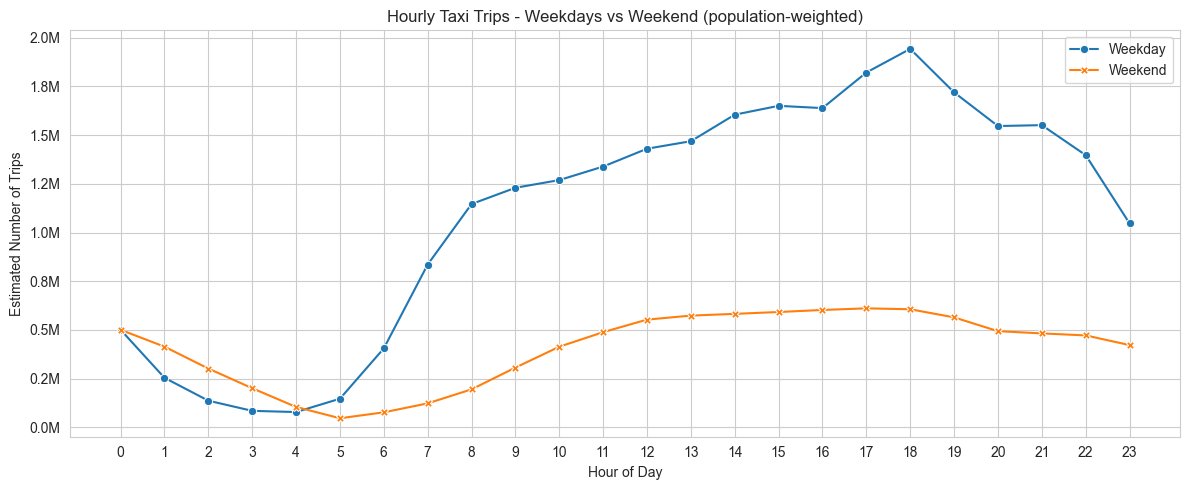

In [115]:
# Compare traffic trends for the week days and weekends

# Add a column to indicate if the pickup day is a weekend (Saturday or Sunday)
df["is_weekend"]  = df["tpep_pickup_datetime"].dt.dayofweek >= 5   # Sat=5, Sun=6

# Population-weighted hourly totals by weekday/weekend
hourly = (df
          .groupby(["is_weekend", "pickup_hour"])["weight"]
          .sum()
          .unstack(level=0)               # columns: False=weekday, True=weekend
          .reindex(range(24), fill_value=0)   # ensure 0-23 order
          .rename(columns={False: "Weekday", True: "Weekend"}))


# Plot both lines in one figure
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))

sns.lineplot(data=hourly, markers=True, dashes=False)

plt.title("Hourly Taxi Trips - Weekdays vs Weekend (population-weighted)")
plt.xlabel("Hour of Day")
plt.ylabel("Estimated Number of Trips")
plt.xticks(range(24))
plt.gca().yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))   # 1.5 M formatting
plt.legend(title="")
plt.tight_layout()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

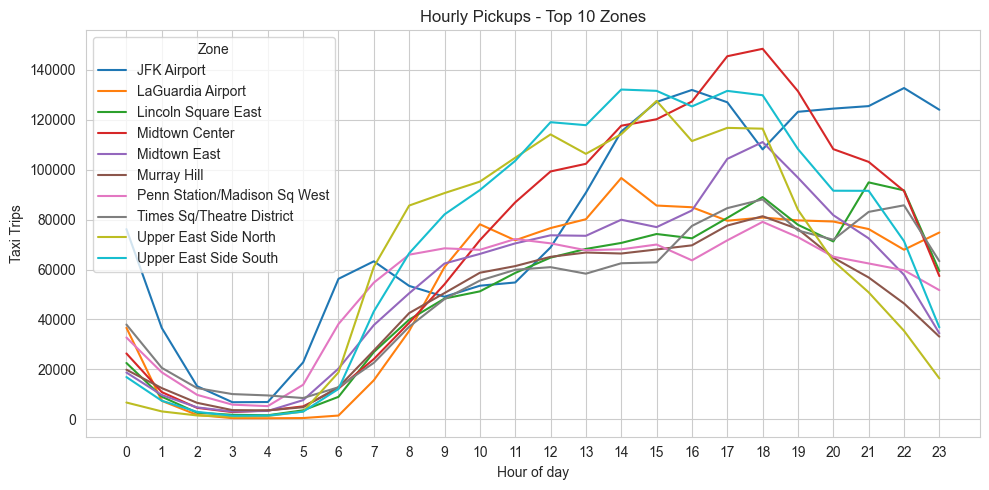

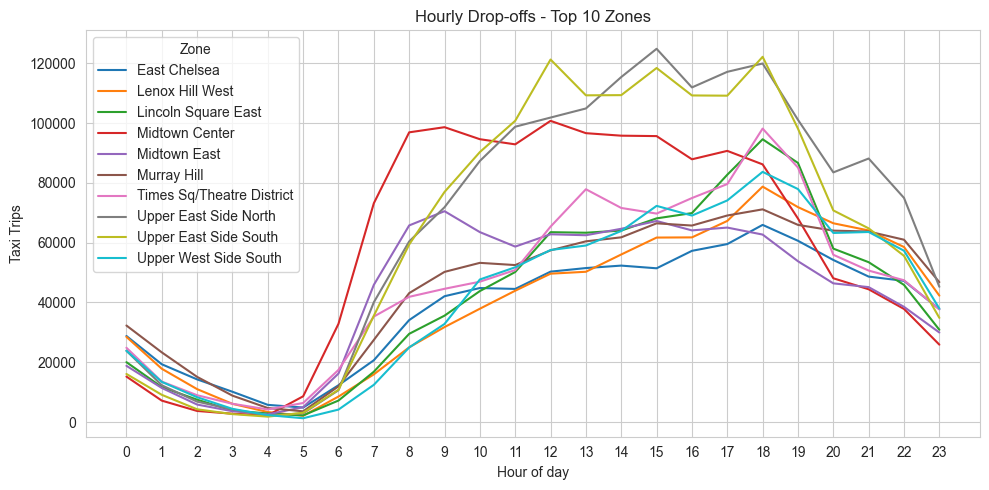

In [116]:
# Find top 10 pickup and dropoff zones
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour          # pickup_hour was already made before but drop_hour is new.
df["drop_hour"]   = df["tpep_dropoff_datetime"].dt.hour

# population-weighted totals
pick_hourly = (df.groupby(["PULocationID", "pickup_hour"])["weight"]
                 .sum()
                 .reset_index(name="trips"))
drop_hourly = (df.groupby(["DOLocationID", "drop_hour"])["weight"]
                 .sum()
                 .reset_index(name="trips"))

# total trips per zone (all hours)
pick_totals = pick_hourly.groupby("PULocationID")["trips"].sum()
drop_totals = drop_hourly.groupby("DOLocationID")["trips"].sum()

# Finding 10 busiest pickups and drop-offs
top10_pick = pick_totals.nlargest(10).index
top10_drop = drop_totals.nlargest(10).index

# Adding names to busiest locations
name_lookup = zones.set_index("LocationID")["zone"]
top10_pick_names = name_lookup.loc[top10_pick]
top10_drop_names = name_lookup.loc[top10_drop]

# Function to plot hourly trends
def plot_trend(hourly_df, id_col, id_list, title):
    hourly_sel = (hourly_df[hourly_df[id_col].isin(id_list)]
                  .merge(zones[["LocationID","zone"]],
                         left_on=id_col, right_on="LocationID")
                  .rename(columns={"zone":"Zone"}))
    hourly_piv = hourly_sel.pivot_table(index="pickup_hour" if id_col=="PULocationID" else "drop_hour",
                                        columns="Zone",
                                        values="trips",
                                        aggfunc="sum").reindex(range(24)).fillna(0)
    hourly_piv.plot(figsize=(10,5))
    plt.title(title)
    plt.xlabel("Hour of day")
    plt.ylabel("Taxi Trips")
    plt.xticks(range(24))
    plt.tight_layout()
    plt.show()

# Plotting hourly trends for 10 busiest pickup and drop-off locations
plot_trend(pick_hourly, "PULocationID", top10_pick, "Hourly Pickups - Top 10 Zones")
plot_trend(drop_hourly, "DOLocationID", top10_drop, "Hourly Drop-offs - Top 10 Zones")



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [117]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Total pickups and drop-offs by zone
pick_totals = df.groupby("PULocationID")["weight"].sum()      
drop_totals = df.groupby("DOLocationID")["weight"].sum()      

# Build one table indexed by LocationID
ratios = pd.DataFrame({
    "pickups" : pick_totals,
    "dropoffs": drop_totals
}).fillna(0)

# Calculate pickup/drop ratio; discard zeros in denominator
ratios = ratios[ratios["dropoffs"] > 0]    # avoiding dividing by 0
ratios = ratios[ratios["pickups"] > 0]
ratios["ratio"] = ratios["pickups"] / ratios["dropoffs"]

# Join readable zone names
ratios = (
    ratios.join(                               
        zones.set_index("LocationID")["zone"]
    )
    .reset_index()                             
                                               
    .rename(columns={
        "index": "ZoneID",                     
        "zone" : "Zone"
    })
)

# Extract top and bottom 10 ratios
top10    = ratios.nlargest(10, "ratio")
bottom10 = ratios.nsmallest(10, "ratio")

# Showing top and bottom 10 pickup/dropoff ratios
def show_plain(df_, title):
    cols = ["ZoneID", "Zone", "pickups", "dropoffs", "ratio"]
    print(f"\n{title}")
    print(
        df_[cols].to_string(
            index=False,
            formatters={
                "pickups" : "{:,.0f}".format,
                "dropoffs": "{:,.0f}".format,
                "ratio"   : "{:.2f}".format
            }
        )
    )

# display results
show_plain(top10,    "Top-10 pickup / drop-off ratios")
show_plain(bottom10, "Lowest-10 pickup / drop-off ratios")



Top-10 pickup / drop-off ratios
 ZoneID                         Zone   pickups  dropoffs ratio
     70                East Elmhurst   166,820    17,120  9.74
    132                  JFK Airport 1,892,200   384,280  4.92
    138            LaGuardia Airport 1,273,000   428,780  2.97
    186 Penn Station/Madison Sq West 1,256,720   794,240  1.58
    114      Greenwich Village South   481,180   344,540  1.40
     43                 Central Park   612,400   445,280  1.38
    249                 West Village   809,100   603,300  1.34
    162                 Midtown East 1,301,800 1,030,980  1.26
    161               Midtown Center 1,693,780 1,406,980  1.20
    100             Garment District   598,640   503,720  1.19

Lowest-10 pickup / drop-off ratios
 ZoneID                                Zone pickups dropoffs ratio
      1                      Newark Airport     580  102,700  0.01
    251                         Westerleigh      20      740  0.03
    257                     Windsor T

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [118]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Defining hours that are considered as night
night_pick = df["pickup_hour"].isin([23,0,1,2,3,4])
night_drop = df["drop_hour"]  .isin([23,0,1,2,3,4])

# Population-weighted totals by zone
pick_night = (df[night_pick]      
              .groupby("PULocationID")["weight"]
              .sum()                                        
              .rename("night_pickups"))

drop_night = (df[night_drop]
              .groupby("DOLocationID")["weight"]
              .sum()
              .rename("night_dropoffs"))

# Attaching zone names
night_traffic = (pd.concat([pick_night, drop_night], axis=1)
                   .fillna(0)
                   .astype(int)
                   .join(zones.set_index("LocationID")["zone"])
                   .reset_index()
                   .rename(columns={"index":"ZoneID", "zone":"Zone"}))

# Finding top 10 high traffic night pickups and dropoffs
top_pu  = night_traffic.nlargest(10, "night_pickups")
top_do  = night_traffic.nlargest(10, "night_dropoffs")

# Display
def show(df_, metric):
    print(f"\nTop 10 zones by {metric} (23:00-05:00)")
    print(df_[["ZoneID","Zone",metric]]
          .to_string(index=False,
                      formatters={metric:"{:,.0f}".format}))
show(top_pu, "night_pickups")
show(top_do, "night_dropoffs")




Top 10 zones by night_pickups (23:00-05:00)
 ZoneID                         Zone night_pickups
     79                 East Village       298,860
    132                  JFK Airport       263,840
    249                 West Village       245,260
     48                 Clinton East       189,840
    148              Lower East Side       188,580
    114      Greenwich Village South       172,620
    230    Times Sq/Theatre District       154,080
    186 Penn Station/Madison Sq West       124,260
    138            LaGuardia Airport       121,540
    164                Midtown South       116,660

Top 10 zones by night_dropoffs (23:00-05:00)
 ZoneID                      Zone night_dropoffs
     79              East Village        170,840
     48              Clinton East        143,920
    170               Murray Hill        131,080
     68              East Chelsea        116,100
    107                  Gramercy        115,040
    141           Lenox Hill West        109,120
    2

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

is_night
day      0.887377
night    0.112623
Name: weighted_revenue, dtype: float64


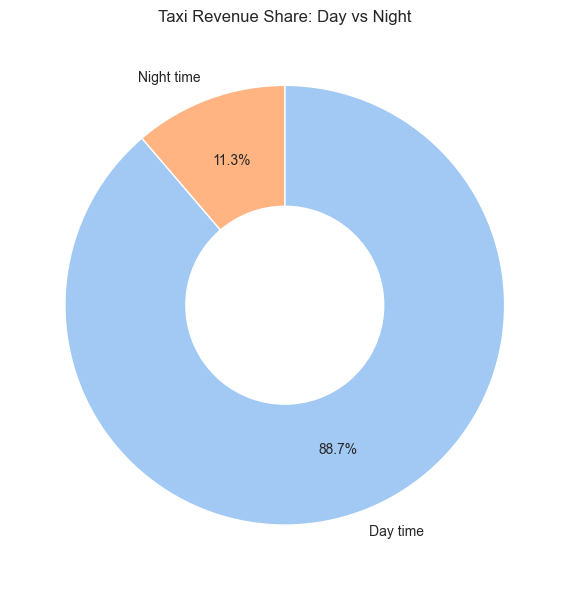

In [119]:
# Filter for night hours (11 PM to 5 AM)

df["is_night"] = night_pick

df["weighted_revenue"] = df["total_amount"] * df["weight"]

# totals
rev_totals = (df.groupby("is_night")["weighted_revenue"].sum()
                .rename({False:"day", True:"night"}))

# % based share for daytime and nighttime 
share = rev_totals / rev_totals.sum()
print(share)

# Showing share as a donut chart 
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
        share,                          
        labels=["Day time", "Night time"],
        autopct="%1.1f%%",
        pctdistance=0.70,
        startangle=90,
        counterclock=False,
        colors=sns.color_palette("pastel"),
        wedgeprops=dict(width=0.55)     
)

plt.setp(wedges, edgecolor="white")     
plt.title("Taxi Revenue Share: Day vs Night")
plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

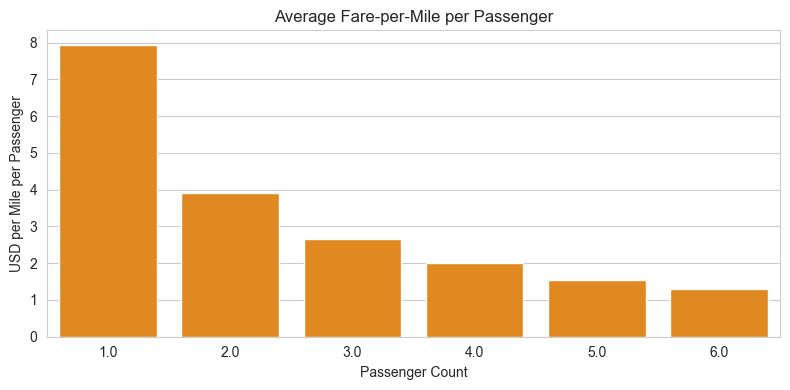

passenger_count
1.0    1351408
2.0     273632
3.0      68101
4.0      37984
5.0      23714
6.0      15537
dtype: int64

In [120]:
# Keep only rows with positive trip distance, fare amount, and passenger count
# Also, passenger count should be between 1 and 6 (inclusive)
df_fpm = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['passenger_count'] > 0) & (df['passenger_count'] <= 6)].copy()

# Calculate fare-per-mile and fare-per-mile per passenger
df_fpm["fare_per_mile"] = df_fpm["fare_amount"] / df_fpm["trip_distance"]
df_fpm["fare_per_mile_per_passenger"] = (
    df_fpm["fare_per_mile"] / df_fpm["passenger_count"]
)

# Calculate the average fare-per-mile per passenger by passenger count
passenger_fare = (
    df_fpm.groupby("passenger_count", as_index=False)["fare_per_mile_per_passenger"]
          .mean()
)

# Plotting the average fare-per-mile per passenger by passenger count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(data=passenger_fare,
            x="passenger_count",
            y="fare_per_mile_per_passenger",
            color="darkorange")
plt.title("Average Fare-per-Mile per Passenger")
plt.xlabel("Passenger Count")
plt.ylabel("USD per Mile per Passenger")
plt.tight_layout()
plt.show()

df_fpm.groupby("passenger_count").size()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

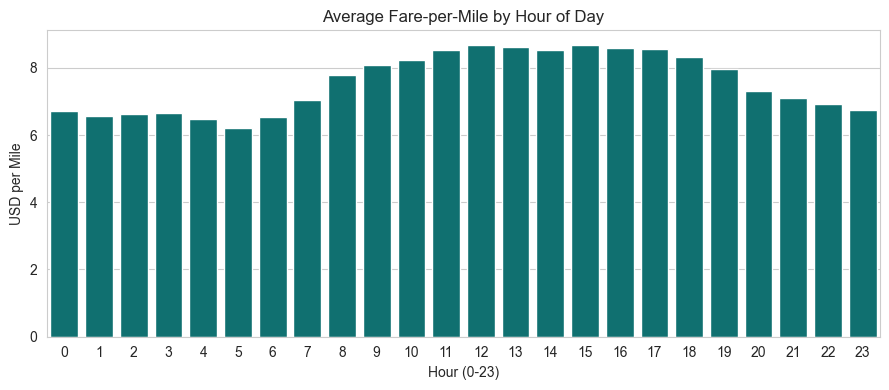

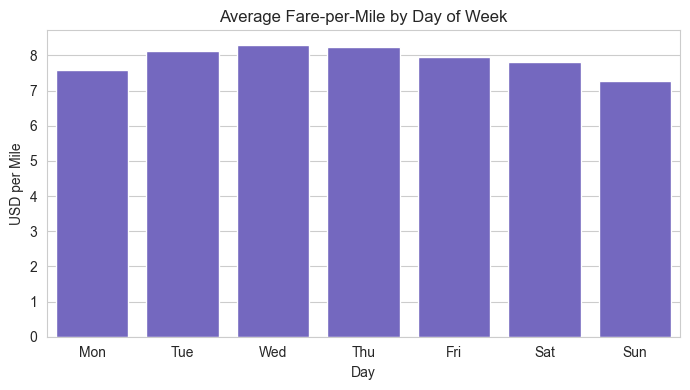

In [121]:
# Compare the average fare per mile for different days and for different times of the day

df_fpm["pickup_hour"]      = df_fpm["tpep_pickup_datetime"].dt.hour          # 0–23
df_fpm["pickup_dayofweek"] = df_fpm["tpep_pickup_datetime"].dt.dayofweek     # 0=Mon … 6=Sun

# Average fare-per-mile by hour of day
fare_hourly = (df_fpm
               .groupby("pickup_hour")["fare_per_mile"]
               .mean()
               .round(2))                          # nice 2-dp display

# Average fare-per-mile by day of week
fare_weekday = (df_fpm
                .groupby("pickup_dayofweek")["fare_per_mile"]
                .mean()
                .round(2))

# Plotting the average fare-per-mile by hour of day
plt.figure(figsize=(9,4))
sns.barplot(x=fare_hourly.index, y=fare_hourly.values, color="teal")
plt.title("Average Fare-per-Mile by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("USD per Mile")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

# Plotting the average fare-per-mile by day of week
plt.figure(figsize=(7,4))
day_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
sns.barplot(x=day_labels, y=fare_weekday.values, color="slateblue")
plt.title("Average Fare-per-Mile by Day of Week")
plt.xlabel("Day")
plt.ylabel("USD per Mile")
plt.tight_layout()
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

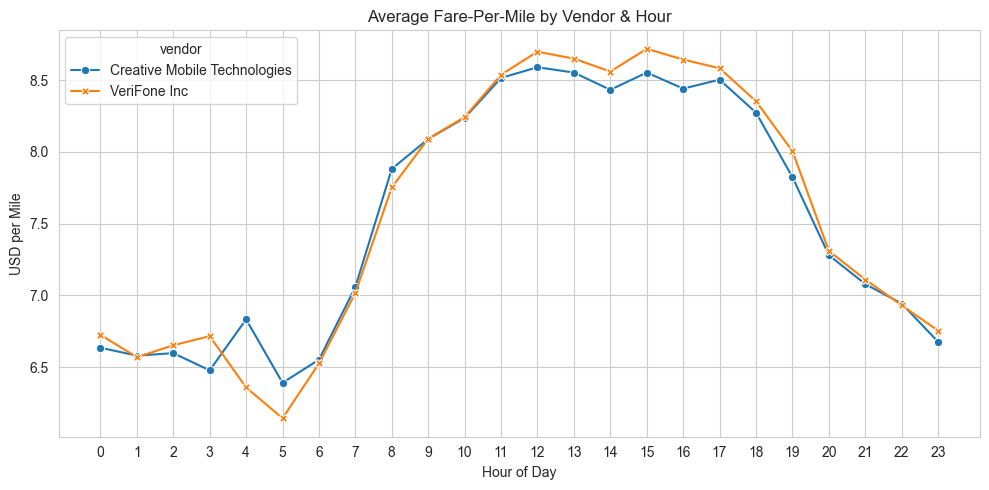

In [122]:
# Compare fare per mile for different vendors

df_fpm["vendor"]      = df_fpm["VendorID"].map({1:"Creative Mobile Technologies", 2:"VeriFone Inc"})
df_fpm["pickup_hour"] = df_fpm["tpep_pickup_datetime"].dt.hour   # 0-23

# Average fare-per-mile by vendor & hour 
vendor_hourly = (
    df_fpm
      .groupby(["vendor", "pickup_hour"])["fare_per_mile"]
      .mean()
      .reset_index()
)

pivot = vendor_hourly.pivot(index="pickup_hour", columns="vendor", values="fare_per_mile")

plt.figure(figsize=(10,5))
sns.lineplot(data=pivot, markers=True, dashes=False)
plt.title("Average Fare-Per-Mile by Vendor & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("USD per Mile")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


distance_tier                 Up to 2 mi  2-5 mi  > 5 mi
vendor                                                  
Creative Mobile Technologies        9.57    6.38    4.42
VeriFone Inc                        9.76    6.55    4.50


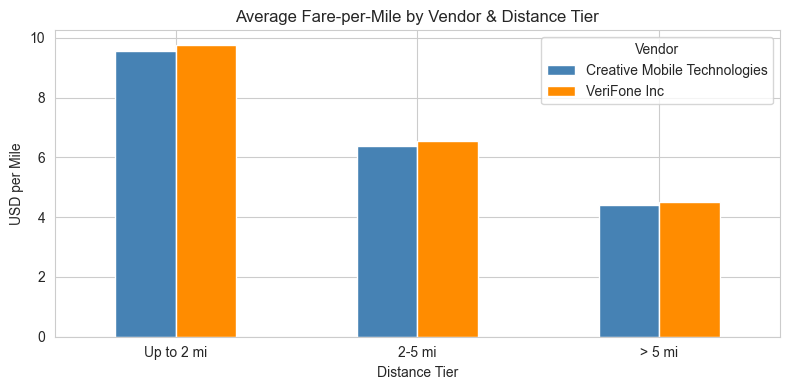

In [123]:
# Defining distance tiers

df_fpm["fare_per_mile"] = df_fpm["fare_amount"] / df_fpm["trip_distance"]

# map numeric VendorID → readable label
vendor_map = {1: "Creative Mobile Technologies", 2: "VeriFone Inc"}
df_fpm["vendor"] = df_fpm["VendorID"].map(vendor_map).fillna("Other")

# distance tiers
bins   = [0, 2, 5, np.inf]
labels = ["Up to 2 mi", "2-5 mi", "> 5 mi"]
df_fpm["distance_tier"] = pd.cut(df_fpm["trip_distance"], bins=bins, labels=labels)

avg_fpm = (
    df_fpm.groupby(["vendor", "distance_tier"], observed=True)["fare_per_mile"]
       .mean()
       .round(2)                             # 2-decimals for clarity
       .unstack(level=1)                     # vendors as rows, tiers as cols
       .loc[["Creative Mobile Technologies", "VeriFone Inc"]]            # keep the two main brands
)

print(avg_fpm)

avg_fpm.T.plot(kind="bar", figsize=(8,4), rot=0, color=["steelblue", "darkorange"])
plt.title("Average Fare-per-Mile by Vendor & Distance Tier")
plt.xlabel("Distance Tier")
plt.ylabel("USD per Mile")
plt.legend(title="Vendor")
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

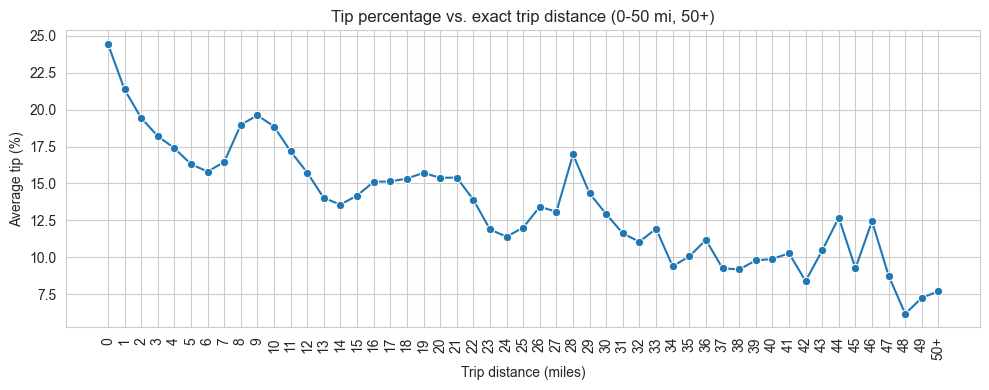

Average tip percentage by exact trip distance:
distance_bucket
0      24.46
1      21.37
2      19.44
3      18.21
4      17.39
5      16.31
6      15.80
7      16.46
8      18.98
9      19.62
10     18.86
11     17.17
12     15.73
13     14.01
14     13.57
15     14.18
16     15.11
17     15.14
18     15.33
19     15.72
20     15.38
21     15.40
22     13.90
23     11.88
24     11.39
25     12.01
26     13.42
27     13.08
28     16.97
29     14.32
30     12.92
31     11.61
32     11.05
33     11.93
34      9.38
35     10.06
36     11.17
37      9.25
38      9.17
39      9.78
40      9.88
41     10.27
42      8.38
43     10.46
44     12.68
45      9.24
46     12.44
47      8.74
48      6.16
49      7.25
50+     7.69


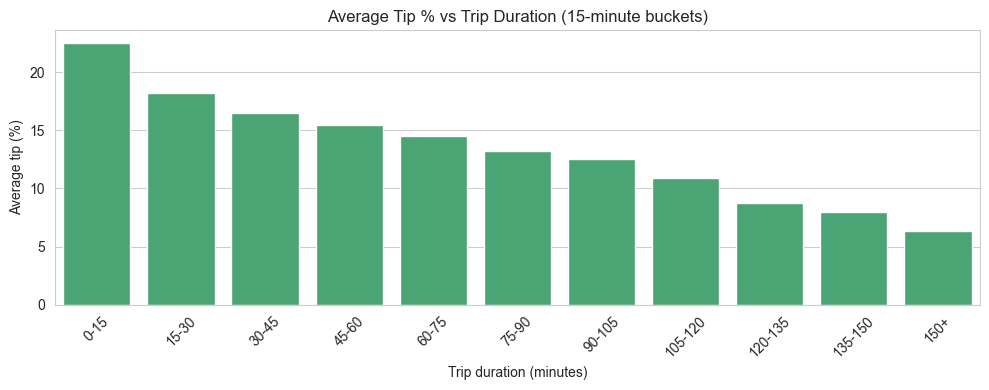

duration_bin
0-15       22.47
15-30      18.22
30-45      16.45
45-60      15.43
60-75      14.50
75-90      13.26
90-105     12.53
105-120    10.90
120-135     8.73
135-150     8.00
150+        6.33


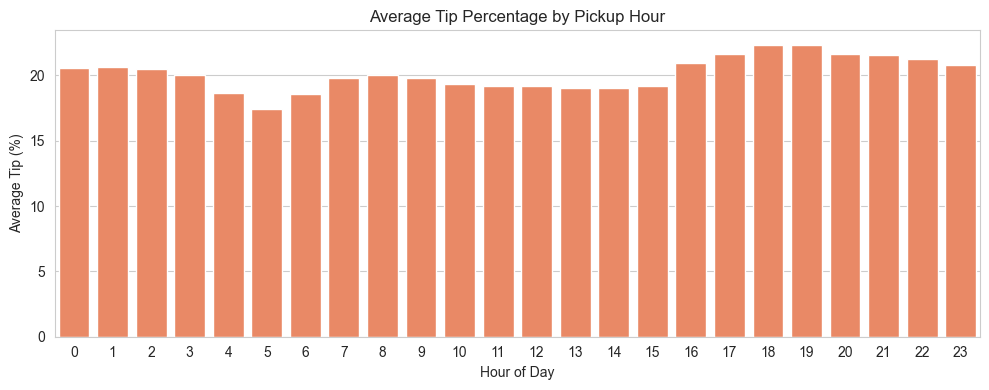

Average tip % by hour:
pickup_hour
0     20.57
1     20.61
2     20.47
3     20.01
4     18.61
5     17.46
6     18.56
7     19.77
8     20.05
9     19.77
10    19.31
11    19.17
12    19.17
13    19.00
14    19.06
15    19.16
16    20.94
17    21.60
18    22.32
19    22.32
20    21.65
21    21.53
22    21.27
23    20.80


In [ ]:

# Filter for trips with reasonable tip amounts (<= $100) and analyze tip percentages
df_tip = df_fpm[ df_fpm["tip_amount"] <= 180 ].copy()

# Calculate tip percentage as a fraction of fare amount
df_tip["tip_percentage"] = 100* df_tip["tip_amount"] / df_tip["fare_amount"]

# TIP PERCENTAGE BY TRIP DISTANCE
# Bucketing trip distances into 0-50 miles and 50+ miles
bins   = list(range(0, 51)) + [np.inf]          # 0,1,2,…,50, inf
labels = [str(i) for i in range(50)] + ["50+"]  # “0” … “49”, “50+”
df_tip["distance_bucket"] = pd.cut(df_tip["trip_distance"],
                                   bins=bins, labels=labels, right=False)

# Average tip % in each mile bucket
avg_tip_pct = (df_tip
               .groupby("distance_bucket", observed=True)["tip_percentage"]
               .mean()
               .round(2))

# Plotting the average tip percentage by trip distance
plt.figure(figsize=(10,4))
sns.lineplot(x=avg_tip_pct.index, y=avg_tip_pct.values, marker="o")
plt.xticks(rotation=90)               # 0,1,2,…49,50+
plt.xlabel("Trip distance (miles)")
plt.ylabel("Average tip (%)")
plt.title("Tip percentage vs. exact trip distance (0-50 mi, 50+)")
plt.tight_layout()
plt.show()

print("Average tip percentage by exact trip distance:")
print(avg_tip_pct.to_string())       

# TIP PERCENTAGE BY TRIP DURATION
# Bucketing trip durations into 15 minute increments upto 150 min
bins   = list(range(0, 151, 15)) + [np.inf]          # 0,15,30,…,150,∞
labels = [f"{i}-{i+15}" for i in range(0, 150, 15)] + ["150+"]
df_tip["duration_bin"] = pd.cut(
    df_tip["trip_duration"], bins=bins, labels=labels, right=False
)

# Average tip % in each duration bin
avg_tip_pct = (
    df_tip.groupby("duration_bin", observed=True)["tip_percentage"]
            .mean()
            .round(2)
)

# Plotting the average tip percentage by trip duration
plt.figure(figsize=(10,4))
sns.barplot(x=avg_tip_pct.index, y=avg_tip_pct.values, color="mediumseagreen")
plt.title("Average Tip % vs Trip Duration (15-minute buckets)")
plt.xlabel("Trip duration (minutes)")
plt.ylabel("Average tip (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(avg_tip_pct.to_string())

# TIP PERCENTAGE BY HOUR OF DAY
# Extracting pickup hour from the pickup datetime
avg_tip_hour = (
    df_tip.groupby("pickup_hour", observed=True)["tip_percentage"]
          .mean()
          .round(2)                       # nicer display
          .reindex(range(24))             # guarantees 0-23 order
)

# Plotting the average tip percentage by pickup hour
plt.figure(figsize=(10,4))
sns.barplot(x=avg_tip_hour.index, y=avg_tip_hour.values, color="coral")
plt.title("Average Tip Percentage by Pickup Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip (%)")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

print("Average tip % by hour:")
print(avg_tip_hour.to_string())




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [132]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tips = df_tip[df_tip['tip_percentage'] < 10]
high_tips = df_tip[df_tip['tip_percentage'] > 25]

#Compare distributions of trip_distance, passenger_count, pickup_hour
compare_df = pd.DataFrame({
    'Metric': ['Trip Distance', 'Passenger Count', 'Pickup Hour'],
    'Low Tip (mean)': [low_tips['trip_distance'].mean(), low_tips['passenger_count'].mean(), low_tips['pickup_hour'].mean()],
    'High Tip (mean)': [high_tips['trip_distance'].mean(), high_tips['passenger_count'].mean(), high_tips['pickup_hour'].mean()]
})
print("Comparison of Low Tip (<10%) vs High Tip (>25%) Trips")
display(compare_df)


Comparison of Low Tip (<10%) vs High Tip (>25%) Trips


,Metric,Low Tip (mean),High Tip (mean)
0,Trip Distance,3.992050,2.304139
1,Passenger Count,1.437639,1.371450
2,Pickup Hour,13.930616,14.610170


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [126]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [127]:
# How does passenger count vary across zones



In [128]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [129]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.